# Classical statistical inference: MLE

## Table of Content

- III. [Maximum Likelihood (MLE)](#III)
    - III.1 [Likelihood function](#III.1-Likelihood:)
    - III.2 [Maximum Likelihood estimation](#III.2--Maximum-Likelihood-Estimation-(MLE))
    - III.3 [Properties of MLE estimators](#III.3.-Properties-of-Maximum-likelihood-estimators)
    - III.4.[Illustration of the MLE approach](#III.4.-Illustration-of-the-MLE-approach)
- IV. Regression and Model fitting: See [Regression.ipynb]([Regression.ipynb])
- XX. [References and supplementary material](#X)

In [2]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## III. Maximum Likelihood <a class="anchor" id="III"></a>

A common way, in the frequentist sense, to make a point estimation and derive a confidence interval, it through Maximum Likelihood analysis. 

The first thing to do in that approach is to choose a model $M(\theta)$ that is supposed to describe the underlying population from which the data are drawn. This allows one to calculate a likelihood as explained below. 

### III.1 Likelihood:


The Likelihood $L$ of a model and of its parameters is defined as $L~=~p(D \,|\,M(\boldsymbol{\theta}))$. Hence, this is the probability of Data given a model (in fact, given a model and its associated set of parameters). 
When we talk about the likelihoods of different models we are in general talking about the likelihoods of different sets of parameter values. 

It is important to note that a likelihood is not strictly speaking a probability as the sum of all the possible outcomes of a model must sum up to one, while the sum of the likelihood of the models (parameters) needed to explain the data do not have to add up to 1. This can be illustrated using a Gaussian case.   

Let's imagine that we have an ensemble of $N$ *independent* random variable {$x_i$} drawn from a normal (i.e. gaussian) distribution of mean $\mu$ and width $\sigma$ (i.e. errors on all the measurements $x_i$ are the same, namely the errors are "homoscedastic"). 

We know that the probability of a given measurement $x_k$ is:

$$
p(x_k \, | \, \mu, \sigma ) = \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{x_k - \mu}{\sigma} \right)^2\right] 
$$

If each measurement is independent of the other, the probability of having a given set of measurements will be proportional to the product of the individual probabilities. The likelihood can then be calculated as:

$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \prod_{i=1}^{N} \frac{1}{\sigma \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{x_i - \mu}{\sigma} \right)^2\right] = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \prod_{i=1}^{N} \exp \left (\frac{-(x_i - \mu)^2}{2\, \sigma^2} \right)
$$

Note that this can be re-written:

$$
L \equiv p(\{x_i\} | \mu, \sigma ) = \frac{1}{\sigma^n (2\,\pi)^{n/2}} \exp \left ( \sum_{i=1}^N \frac{-(x_i - \mu)^2}{2\, \sigma^2} \right)
$$

If you make a measurement of a random variable and obtain a value $x$, the associated likelihood $L$ can be considered as a function of the data (i.e. the likelihood depends on the data you have obtained). Conversely, you may also consider that you can vary model parameters, and search for the parameters that maximize the likelihood (i.e. maximize the change you have to make that specific measurement). In that case we can say that it is a function of the model.

### III.2  Maximum Likelihood Estimation (MLE)

The so called *Maximum Likelihood Approach* used by frequentists (and originally introduced by Fisher -as a third year undegraduate- about 100 years ago), consists in considering the likelihood as a function of the model (parameters) and not as a function of the data. The idea behind the maximization of the likelihood is two fold: i) the probability of any given set of parameters $\boldsymbol{\theta}$ is proportional to the probability of observing the data (i.e. the likelihood defined above); ii) the most probable set of values of the parameters (of our model) should also be the one that maximizes the probability of obtaining the data. 

Seeing the likelihood in the context of the Bayes theorem makes the above argument clearer. The probability to obtain a given set of parameters $\boldsymbol{\theta}$ : 

$$
p(M({\boldsymbol \theta})\,|\,D) = \frac{p(D \, | \,M({\boldsymbol\theta})) \, p(M({\boldsymbol \theta}))) }{p(D)}
$$

[Note that in that expression $p(M({\boldsymbol \theta})\,|\,D)$ is called *posterior probability* (of the model given the data), $p(M({\boldsymbol \theta}))$ is the prior on the model parameters, and $p(D) = \int \, p(D \, | \, M({\boldsymbol\theta^\prime}))\, p(M({\boldsymbol \theta^\prime})) {\rm d}{\boldsymbol \theta}^\prime$ is a normalisation factor. ]

If you assume that you have the same probability for your parameters to occur (i.e. $p(M({\bf \theta}))$ is uniform), then by maximizing the likelihood, you also maximize the posterior probability of your model (parameters). 

Because the likelihood can quickly become very small, one generally calculates its logarithm.  The maximum of $\ln{L}$ (varying the parameters $\theta$) is obtained by searching the parameters $\theta$ that yield:

$$
\left. \frac{{\rm d}ln(L(\theta_i))}{\rm{d}\theta_i}\right\vert_{\hat {\theta_i}} \equiv 0
$$

For our gaussian example, and specialised to the mean $\mu$, we have:

$$
\ln(L) =  -\frac{N}{2}\,\ln(2\pi) - N\,\ln(\sigma)  - \sum_{i=1}^N \frac{(x_i \,- \, \mu)^2}{2\,\sigma^2}, 
$$

which is maximum for:

$$
\hat{\mu} = \frac{1}{N} \, \sum_{i=1}^{N} x_i
$$

We can also calculate the derivative w.r.t. to $\sigma$:

$$
\frac{\partial ln(L)}{\partial \sigma} = 0 = -\frac{N}{\sigma} \, +\, \frac{1}{\sigma^3} \, \sum_i \, (x_i - \mu)^2 
$$

Hence, 

$$
\hat{\sigma}^2 = \frac{1}{N} \, \sum_i{(x_i-\mu)^2}
$$

This tells us that our estimator of the mean, $\hat{\mu}$, and of the variance (for a distribution of known mean) $\hat{\sigma}^2$ are maximum likelihood estimators.


#### III.2.1 MLE applied to heteroscedastic errors:   <a class="anchor" id="III.2.1"></a>

We'll see here what is the maximum likelihood estimator for a sample of data points drawn from a gaussian distribution but each point having a different error $\sigma_i$ (heteroscedastic errors).  

The approach is the same as for homoscedastic errors but replacing $\sigma$ by $\sigma_i$.    
The likelihood is the product of the $p(x \, | \, \mu, \sigma_i)$ associated to each points.   

$$
L = \prod_{i=1}^{N} \frac{1}{\sigma_i \sqrt{2\,\pi}} \, \exp\left[-0.5 \left (\frac{x_i - \mu}{\sigma_i} \right)^2\right] =  \frac{1}{(2\,\pi)^{n/2}} \prod_{i=1}^{N} \frac{1}{\sigma_i} \exp \left (\frac{(x_i - \mu)^2}{2\, \sigma_i^2} \right)
$$


We therefore have :

$$
\ln(L) =  -\frac{N}{2}\,\ln(2\pi) - \sum_i \ln(\sigma_i)  - \sum_{i=1}^N \frac{(x_i \,- \, \mu)^2}{2\,\sigma_i^2}, 
$$

So, taking the partial derivative of this likelihood w.r.t. $\mu$, we get:

$$
\hat{\mu} = \frac{\sum_i \, w_i \, x_i}{\sum_i \, w_i}
$$

where $w_i = \sigma^{-2}_i$ . 

Hence the MLE estimator of the mean is simply the weighted arithmetic mean of all measurements. 

### III.3. Properties of Maximum likelihood estimators

MLE are popular in frequentist inference because they gather important properties:

1. **consistency**: This means that they converge to the true value when the size of the sample increases. 
2. **asymptotically normal** estimator: When the size of the sample increases, the distribution of the parameter estimator $\hat{\theta}$ converges towards a normal distribution centered on the MLE, with a certain spread. This spread can often be calculated easily to estimate the uncertainty on $\hat{\theta}$.
3. ** best possible error** given the data. This means that asymptotically, MLE achieve the **theoretical possible minimum of the variance** (Cramèr-Rao bound). 
4. **Equivariant** estimator: if $\hat{\theta}$ is a MLE estimator of $\theta$, then $g(\hat{\theta})$ is a MLE of $g(\theta)$

**Warning:** these properties rely on some assumptions regarding i) the model from which are drawn the data (i.e. they are all drawn from the same class of pdf -a gaussian in the model above); ii) regularity conditions that allows some derivative to exists (see Chapter 10 of [Lupton 1993](#LUP93) ). 

### III.4. Illustration of the MLE approach 

Let's first look to a simple illustration that consists of a Poisson distribution. 
First, we define the log-likelihood. Then we make some Poisson sample data, with a rate parameter of 10. This could be, for example, a count rate in a photon detector detecting of the order of 10 photons per second. 

In [3]:
sample = np.random.poisson(10, size=10000)
print sample[0:10]

[ 9  9 11  8 10  6  7  8 12 15]


In [4]:
def poisson_loglike(rate, data):
    ## make rate parameter into array of same length as data:
    r = np.ones(len(data))*rate
    ## now we can compute the log-likelihood:
    llike = -np.sum(r) + np.sum(data*np.log(r))-np.sum(scipy.special.gammaln(data + 1))
    return llike

np.random.seed(123546)
sample = np.random.poisson(10, size=10000)

I'll leave it to you to verify that the expression in the definition of the likelihood function is indeed that of the Poisson likelihood for N samples. 

Now, let's have a look at the shape of the likelihood. We'll use the first 10, 100, 1000, 5000 events from our sample:

Max likelihood log(L)=-25.80, from 10 points, at 9.00 vs E(X) 9.30
Max likelihood log(L)=-247.92, from 100 points, at 10.00 vs E(X) 10.32
Max likelihood log(L)=-2572.32, from 1000 points, at 10.00 vs E(X) 10.07
Max likelihood log(L)=-12766.49, from 5000 points, at 10.00 vs E(X) 9.96


/home/dominis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log


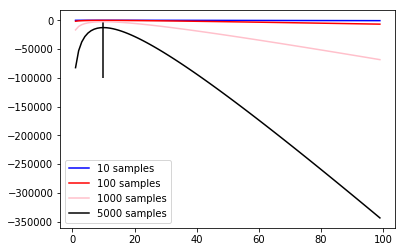

In [5]:
## guess_like returns likelihood associated to a sample s, for a bunch of guessed values for the rate (in the range 0, 100)
def guess_like(s):
    guesses = np.arange(100)
    like_all = [poisson_loglike(g, s) for g in guesses]  
    return like_all

def plot_like(nsamples, color):
    np.random.seed(123546)
    sample = np.random.poisson(10, size=10000)
    x = np.arange(100)
    llike = np.array(guess_like(sample[:nsamples]))
    plt.plot(x, llike, label="%i samples"%nsamples, color=color)
    lpos = np.array(guess_like(sample[:nsamples])).argmax()
    return  llike, x[lpos]
    

fig = plt.figure(figsize=(6,4))
colors = ['blue', 'red', 'pink', 'black']
for j, nsamp in enumerate([10, 100, 1000, 5000]):   # "Number of measurements I take"
    log_L, x = plot_like(nsamp, colors[j])
    print 'Max likelihood log(L)=%.2f, from %.i points, at %.2f vs E(X) %.2f' %(log_L.max(), nsamp, x, np.mean(sample[:nsamp]))
plt.vlines(10, 0, -100000)
plt.legend()

Alternative is to use minimization algorithm such as e.g. powell function minimization.

In [6]:
nsamples = 5000
## define the -log-likelihood as an "anonymous function" lambda
neg_poisson = lambda r: -poisson_loglike(r, sample[:nsamples])

## minimise using Powell's algorithm, starting value for rate parameter is 20
result = scipy.optimize.fmin_powell(neg_poisson, 20, full_output=True)

print("The fit-parameter for the Poisson rate parameter: %.3f "%result[0])


Optimization terminated successfully.
         Current function value: 12766.075826
         Iterations: 2
         Function evaluations: 24
The fit-parameter for the Poisson rate parameter: 9.959 


/home/dominis/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in log


## XX. References and supplementary material: <a class="anchor" id="X"></a>

**Chapter 4 ** (4.5, 4.7), **Chapter 8 ** (8.1, 8.2, 8.7) of the book <a class="anchor" id="book"></a> *Statistics, data mining and Machine learning in astronomy* by Z. Ivezic et al. in Princeton Series in Modern Astronomy. 

* $\chi^2$ and linear fits, Andy Gould, https://arxiv.org/abs/astro-ph/0310577

* *All of statistics: a concise course in statistical inference*, Wasserman 2004  <a class="anchor" id="WAS04"></a> (see also errata in http://www.stat.cmu.edu/~larry/all-of-statistics/): **Chapter 8, 9 **

* *Statistics in theory and Practice*, Lupton 1993 <a class="anchor" id="LUP93"></a>: **Chapter 6, 7, 8, 9 **

* [Numerical recipes](http://www2.units.it/ipl/students_area/imm2/files/Numerical_Recipes.pdf) by Press et al. Cambridge University press: **Chapter 15**

Other useful references to know more about the topics covered in this class: 

- Sklearn help: http://scikit-learn.org/stable/modules/linear_model.html

- Guide on General Least Square regression by Paul Johnson: http://pj.freefaculty.org/guides/stat/Regression/GLS/GLS-1-guide.pdf

- Contribution of Fisher to MLE: J.A. Aldrich R. A. Fisher and the Making of Maximum Likelihood 1912– 1922 About Fisher's invention of Maximum Likelihood: Statistical science, 1997, 12, 3, 162 https://projecteuclid.org/download/pdf_1/euclid.ss/1030037906 

